# XAI Technologien

Der Code verwendet SHAP, um die Erklärungen für die Vorhersagen des Random Forest-Modells zu generieren und sie visuell darzustellen. Die Zusammenfassungsgrafik zeigt die aggregierten Auswirkungen der Features auf die Vorhersagen.

c:\Users\Noemi\anaconda3\envs\spenv\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Noemi\anaconda3\envs\spenv\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_ma

 97%|=================== | 572/588 [00:26<00:00]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


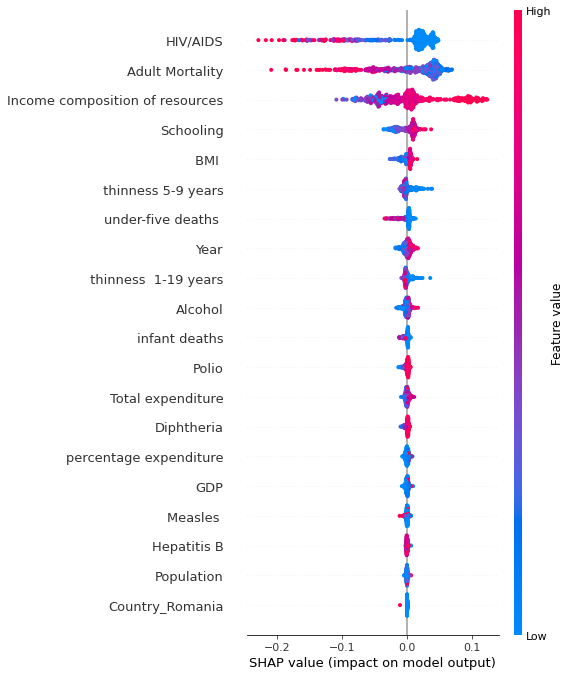

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
import shap

# Lade deine Daten aus einer CSV-Datei
df = pd.read_csv("../data/life_expectancy_cleaned.csv")

# Behandle kategoriale Daten durch One-Hot-Encoding
df = pd.get_dummies(df)

# Überprüfe auf fehlende Werte
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())  # Dies ist eine einfache Methode, um fehlende Werte zu behandeln. Du könntest auch eine anspruchsvollere Methode verwenden.

# Teile deine Daten in Features (X) und Zielvariable (y) auf
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# Teile den Datensatz in einen Trainings- und Testdatensatz auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lade das trainierte Modell
rforest = joblib.load("../Models/random_forest_model.joblib")

# Initialisiere die JavaScript-Visualisierungen
shap.initjs()

# Sample den Trainingsdatensatz
X_train_sample = shap.sample(X_train, 100)  # Passe die Anzahl basierend auf der Kapazität deines Systems an

# Erkläre die Vorhersagen des Random Forest-Modells mit dem gesampleten Trainingsdatensatz
explainer = shap.TreeExplainer(rforest, X_train_sample, check_additivity=False)
shap_values = explainer.shap_values(X_test)

# Visualisiere die SHAP-Werte
shap.summary_plot(shap_values, X_test)


Die shap.force_plot()-Funktion ermöglicht es, die Auswirkungen der einzelnen Features auf die Vorhersagen des Modells zu visualisieren und zu interpretieren.

In [2]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

Die Funktion `shap.dependence_plot('Alcohol', shap_values, X_test)` erstellt ein SHAP-Abhängigkeitsdiagramm, das den Einfluss des Merkmals 'SchoAlcohololing' auf die Vorhersagen basierend auf den SHAP-Werten und den Testdaten ('X_test') visualisiert.

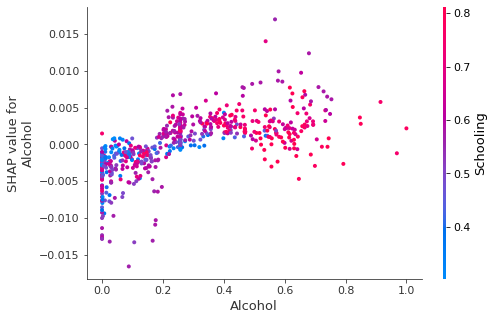

In [3]:
shap.dependence_plot('Alcohol', shap_values, X_test)

Die Funktion `shap.dependence_plot('Schooling', shap_values, X_test)` erstellt ein SHAP-Abhängigkeitsdiagramm, das den Einfluss des Merkmals 'Schooling' auf die Vorhersagen basierend auf den SHAP-Werten und den Testdaten ('X_test') visualisiert.

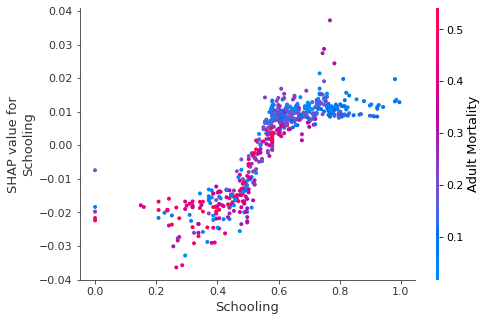

In [4]:
shap.dependence_plot('Schooling', shap_values, X_test)